# Glass Identification

### Project Description

The dataset describes the chemical properties of glass and involves classifying samples of glass using their chemical properties as one of six classes. The dataset was credited to Vina Spiehler in 1987. The study of classification of types of glass was motivated by criminological investigation. At the scene of the crime, the glass left can be used as evidence...if it is correctly identified!

The chemical compositions are measured as the weight percent in corresponding oxide.

##### Attribute Information-

**1.	Id number:** 1 to 214

**2.	RI:**  refractive index

**3.	Na:**  Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)

**4.	Mg:**  Magnesium

**5.Al: Aluminum**

**6.Si: Silicon**

**7.K: Potassium**

**8.	Ca: Calcium**

**9.	Ba: Barium**

**10.	Fe: Iron**

**11.	Type of glass:** (class attribute)

**•	1- building_windows_float_processed**

**•	2- building_windows_non_float_processed**

**•	3- vehicle_windows_float_processed**

**•	4- vehicle_windows_non_float_processed (none in this database)**

**•	5- containers**

**•	6- tableware**

**•	7- headlamps**

**Note: There are 214 observations in the dataset. The dataset can be divided into window glass (classes 1-4) and non-window glass (classes 5-7).**

#### **Predict :** Type of glass

**Dataset Link-**

•	https://raw.githubusercontent.com/dsrscientist/dataset3/main/glass.csv

•	https://github.com/dsrscientist/dataset3


In [169]:
import numpy as np
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [170]:
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset3/main/glass.csv", header=None)
display(df)

,0,1,2,3,4,5,6,7,8,9,10
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


**header=None** means that the CSV file doesn't have names for the columns in the first row. When we use header=None, Pandas will make up column names like 0, 1, 2, and so on.

In [171]:
print(df.columns)

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], dtype='int64')


**The DataFrame has columns labeled with integer indices from 0 to 10.**

In [172]:
# Replacing the integers columns with meaningful column names

df.columns=["Id","RI","Na","Mg","Al","Si","K","Ca","Ba","Fe","Type"]
df

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


**About Dataset:**

**Id:**  A unique identifier for each sample.

**RI (Refractive Index):** The measure of how much light is bent as it passes through a material.

**Na (Sodium):** The percentage of sodium in the material.

**Mg (Magnesium):** The percentage of magnesium in the material.

**Al (Aluminum):** The percentage of aluminum in the material.

**Si (Silicon):** The percentage of silicon in the material.

**K (Potassium):** The percentage of potassium in the material.

**Ca (Calcium):** The percentage of calcium in the material.

**Ba (Barium):** The percentage of barium in the material.

**Fe (Iron):** The percentage of iron in the material.

**Type:** A categorical variable indicating the type of glass. 

In [173]:
df.head()

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [174]:
df.tail()

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
209,210,1.51623,14.14,0.0,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.0,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.0,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.0,1.94,73.61,0.00,8.48,1.57,0.0,7
213,214,1.51711,14.23,0.0,2.08,73.36,0.00,8.62,1.67,0.0,7


In [175]:
df.sample()

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
72,73,1.51593,13.09,3.59,1.52,73.1,0.67,7.83,0.0,0.0,2


###### Explanatory Data Analysis

In [176]:
# Checking the dimension of Dataset
df.shape

(214, 11)

In [177]:
df.columns

Index(['Id', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

In [178]:
#Groups columns by data type

df.columns.to_series().groupby(df.dtypes).groups

{int64: ['Id', 'Type'], float64: ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']}

In [179]:
#Checking for specified values in DataFrame
df.isin([' ','NA','_', 'Nan','0']).any()

Id      False
RI      False
Na      False
Mg      False
Al      False
Si      False
K       False
Ca      False
Ba      False
Fe      False
Type    False
dtype: bool

In [180]:
df.isna().sum()

Id      0
RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

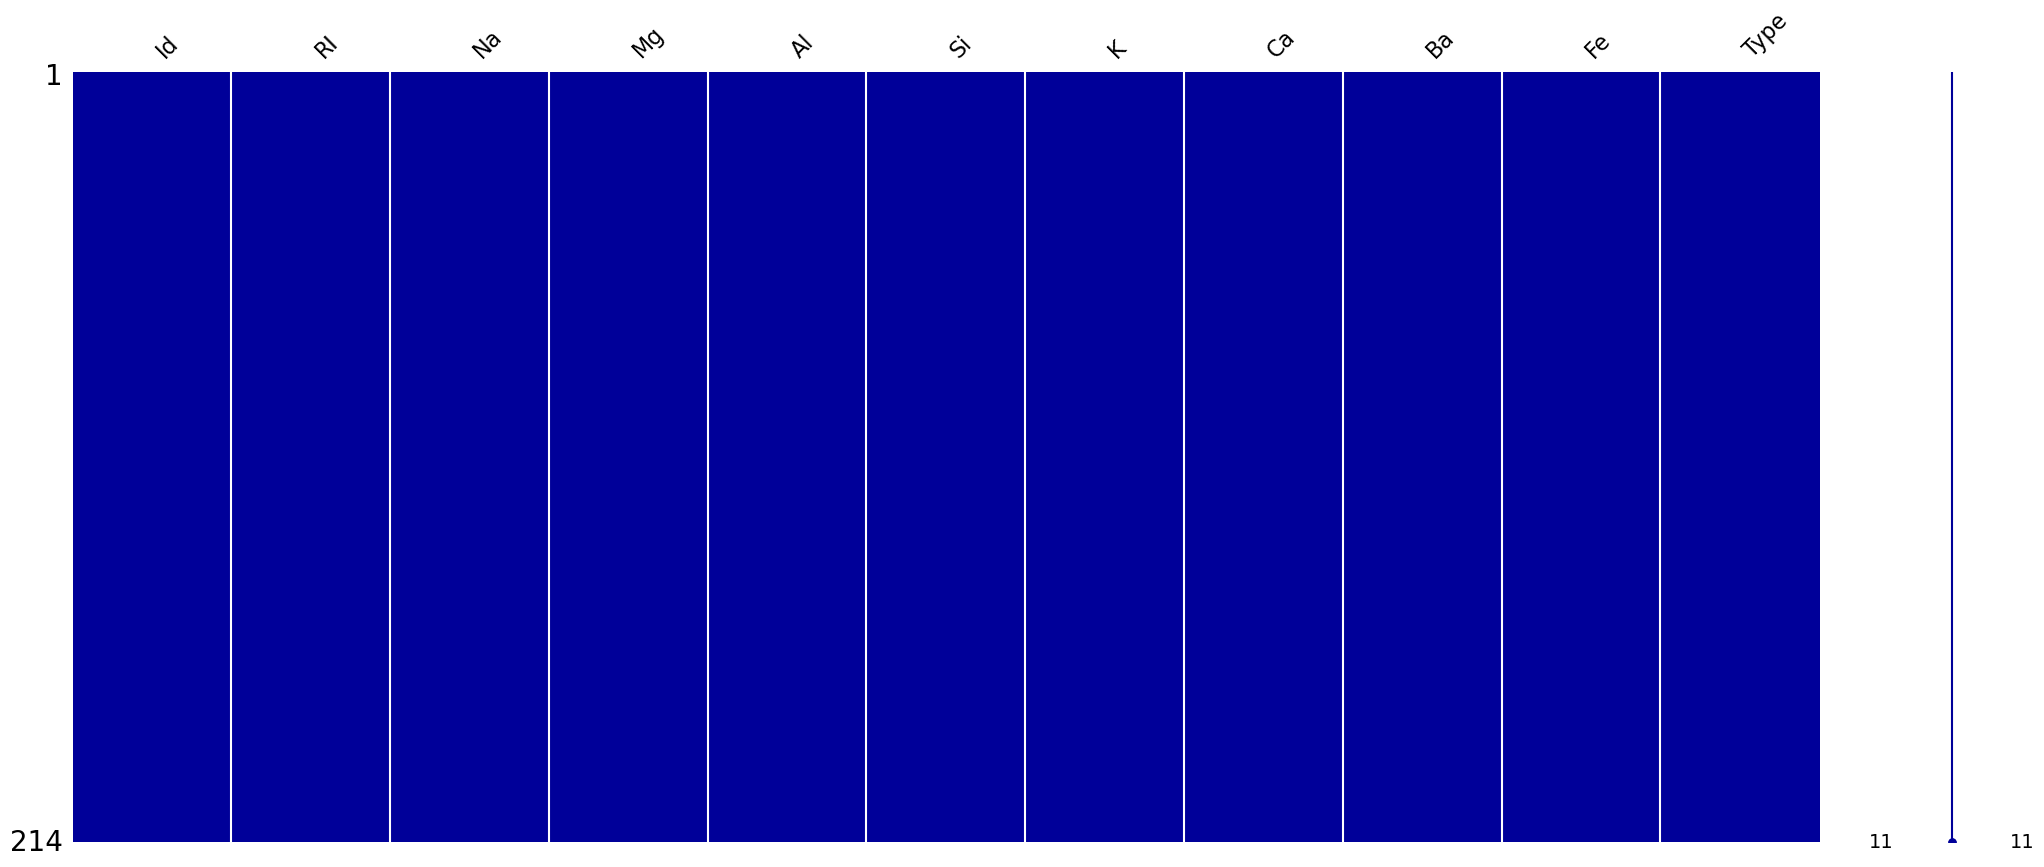

In [181]:
msno.matrix(df, color=(0, 0, 0.6))
plt.show()

In [182]:
# Checking for duplicate rows
df.duplicated().sum()

0

In [183]:
df.nunique()

Id      214
RI      178
Na      142
Mg       94
Al      118
Si      133
K        65
Ca      143
Ba       34
Fe       32
Type      6
dtype: int64

In [184]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      214 non-null    int64  
 1   RI      214 non-null    float64
 2   Na      214 non-null    float64
 3   Mg      214 non-null    float64
 4   Al      214 non-null    float64
 5   Si      214 non-null    float64
 6   K       214 non-null    float64
 7   Ca      214 non-null    float64
 8   Ba      214 non-null    float64
 9   Fe      214 non-null    float64
 10  Type    214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


<Axes: >

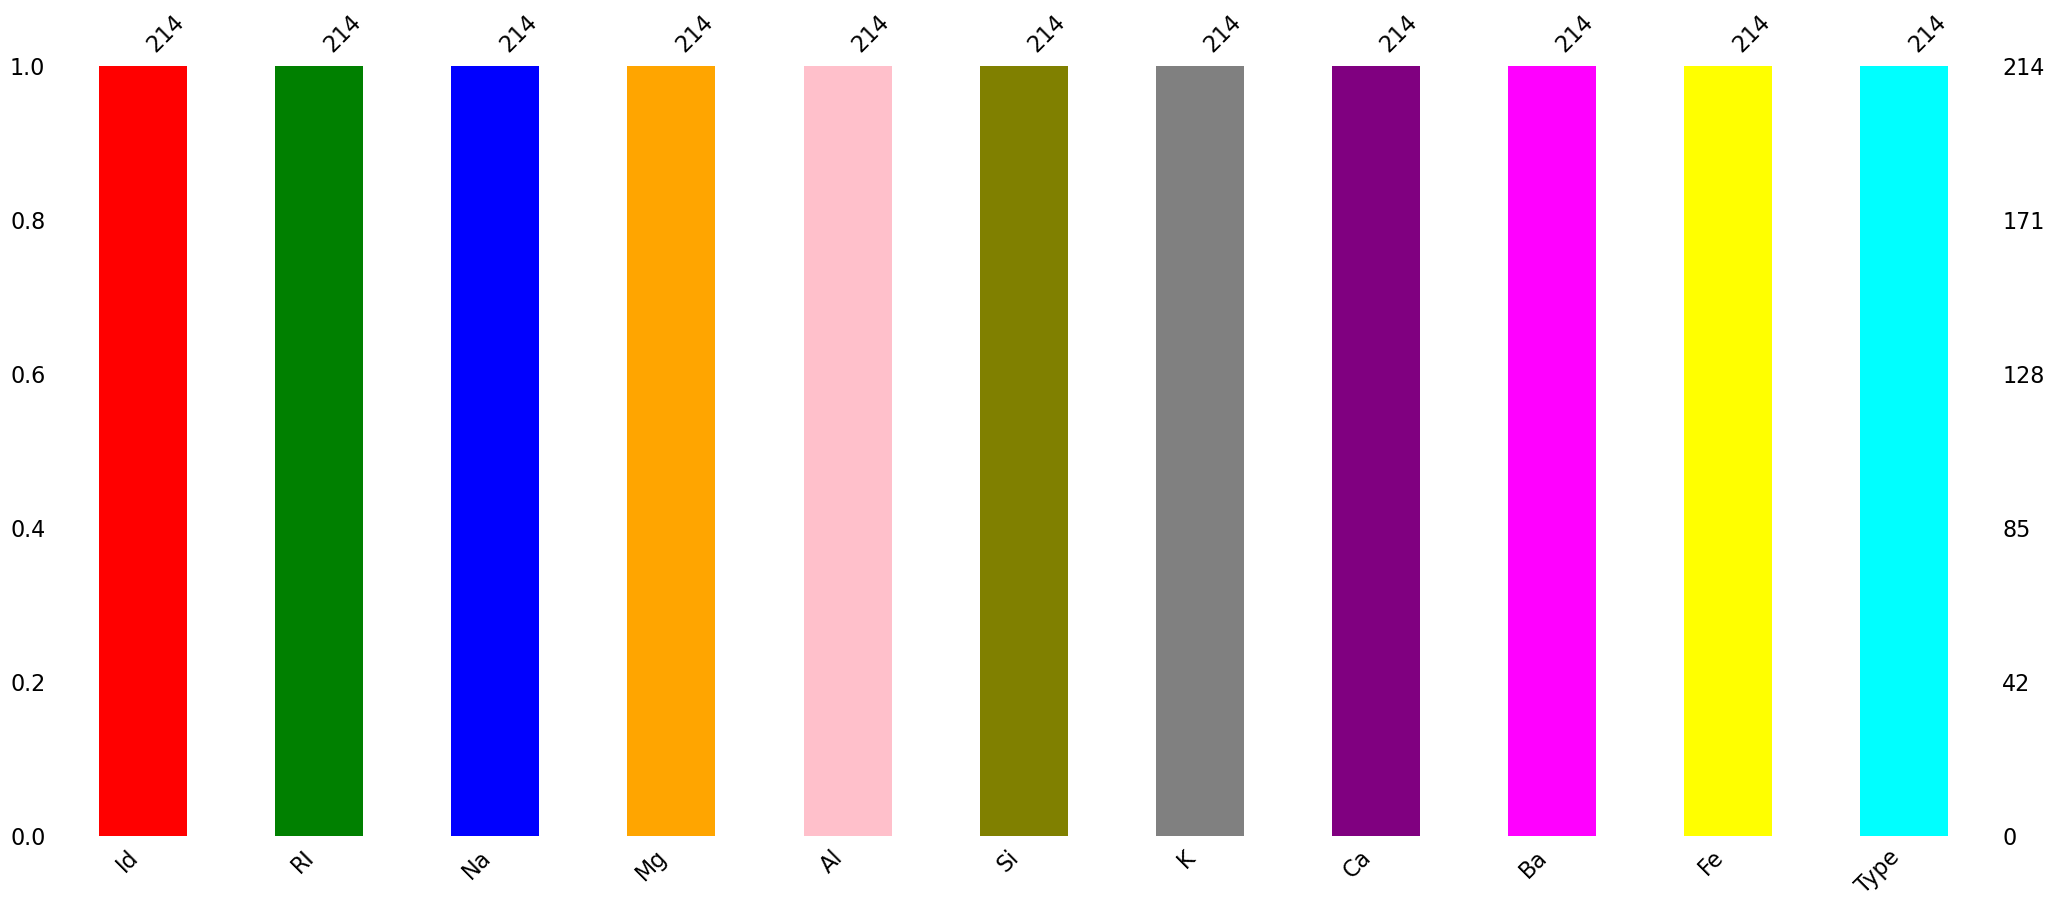

In [185]:
msno.bar(df, color=['red', 'green', 'blue', 'orange', 'pink', 'olive', 'grey', 'purple','magenta', 'yellow', 'cyan'])

**With the information compiled and visualization, we can see the below mentioned points:**
   * The DataFrame consists of 214 rows and 11 columns, labeled 'Id', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', and        'Type', featuring a mix of int64 and float64 data types.
   
   * No missing values in columns (214 non-null each), indicating data completeness.
   * The DataFrame uses 18.5 KB memory, indicating a modest dataset size.
   * 'Type' column as int64 suggests diverse categorical distinctions or classifications.

In [186]:
#Statistical summary of dataset

df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Id,214.0,107.500000,61.920648,1.00000,54.250000,107.50000,160.750000,214.00000
RI,214.0,1.518365,0.003037,1.51115,1.516522,1.51768,1.519157,1.53393
Na,214.0,13.407850,0.816604,10.73000,12.907500,13.30000,13.825000,17.38000
Mg,214.0,2.684533,1.442408,0.00000,2.115000,3.48000,3.600000,4.49000
Al,214.0,1.444907,0.499270,0.29000,1.190000,1.36000,1.630000,3.50000
Si,214.0,72.650935,0.774546,69.81000,72.280000,72.79000,73.087500,75.41000
K,214.0,0.497056,0.652192,0.00000,0.122500,0.55500,0.610000,6.21000
Ca,214.0,8.956963,1.423153,5.43000,8.240000,8.60000,9.172500,16.19000
Ba,214.0,0.175047,0.497219,0.00000,0.000000,0.00000,0.000000,3.15000
Fe,214.0,0.057009,0.097439,0.00000,0.000000,0.00000,0.100000,0.51000


**Observation from Statistical summary of dataset**
* The counts of all columns are same which means there are no missing values in the dataset.
* The mean and median are equal in Id column, indicating a symmetric distribution. No skewness or outliers are affecting the central           tendency.
* The mean and median are equal in few columns such as RI (Refractive Index), Na (Sodium), Al (Aluminum), Si (Silicon), K         (Potassium) and Ca (Calcium), indicates a relatively symmetric distribution.
* The mean and median are quite different in few columns such as Mg (Magnesium), Ba (Barium), Fe (Iron) and Type, indicates a     skewed distribution.
* Some columns have high, moderate and low standard deviation values which are indicating to a wider spread of values, moderate   variability and  low variability.
* we can also see that high difference in 75% and maximum values. Which recognizes the presence of outliers.

In [187]:
for i in df.columns:
    print(df[i].value_counts(),'\n')

1      1
135    1
137    1
138    1
139    1
      ..
75     1
76     1
77     1
78     1
214    1
Name: Id, Length: 214, dtype: int64 

1.52152    3
1.51590    3
1.51645    3
1.51754    2
1.51841    2
          ..
1.51625    1
1.51569    1
1.51605    1
1.51588    1
1.51651    1
Name: RI, Length: 178, dtype: int64 

13.02    5
13.21    5
13.00    5
13.64    4
13.33    4
        ..
13.34    1
13.31    1
14.17    1
13.51    1
14.23    1
Name: Na, Length: 142, dtype: int64 

0.00    42
3.48     8
3.58     8
3.54     8
3.52     7
        ..
2.76     1
3.15     1
2.90     1
3.83     1
1.78     1
Name: Mg, Length: 94, dtype: int64 

1.54    8
1.19    6
1.43    5
1.29    5
1.23    5
       ..
1.08    1
1.64    1
1.61    1
1.07    1
1.94    1
Name: Al, Length: 118, dtype: int64 

72.86    4
72.99    4
73.10    4
73.28    4
73.11    4
        ..
73.55    1
72.34    1
72.26    1
73.26    1
73.61    1
Name: Si, Length: 133, dtype: int64 

0.00    30
0.57    12
0.56    11
0.60    11
0.58    10
   

###### Data Visualisation ---- Graphical Analysis

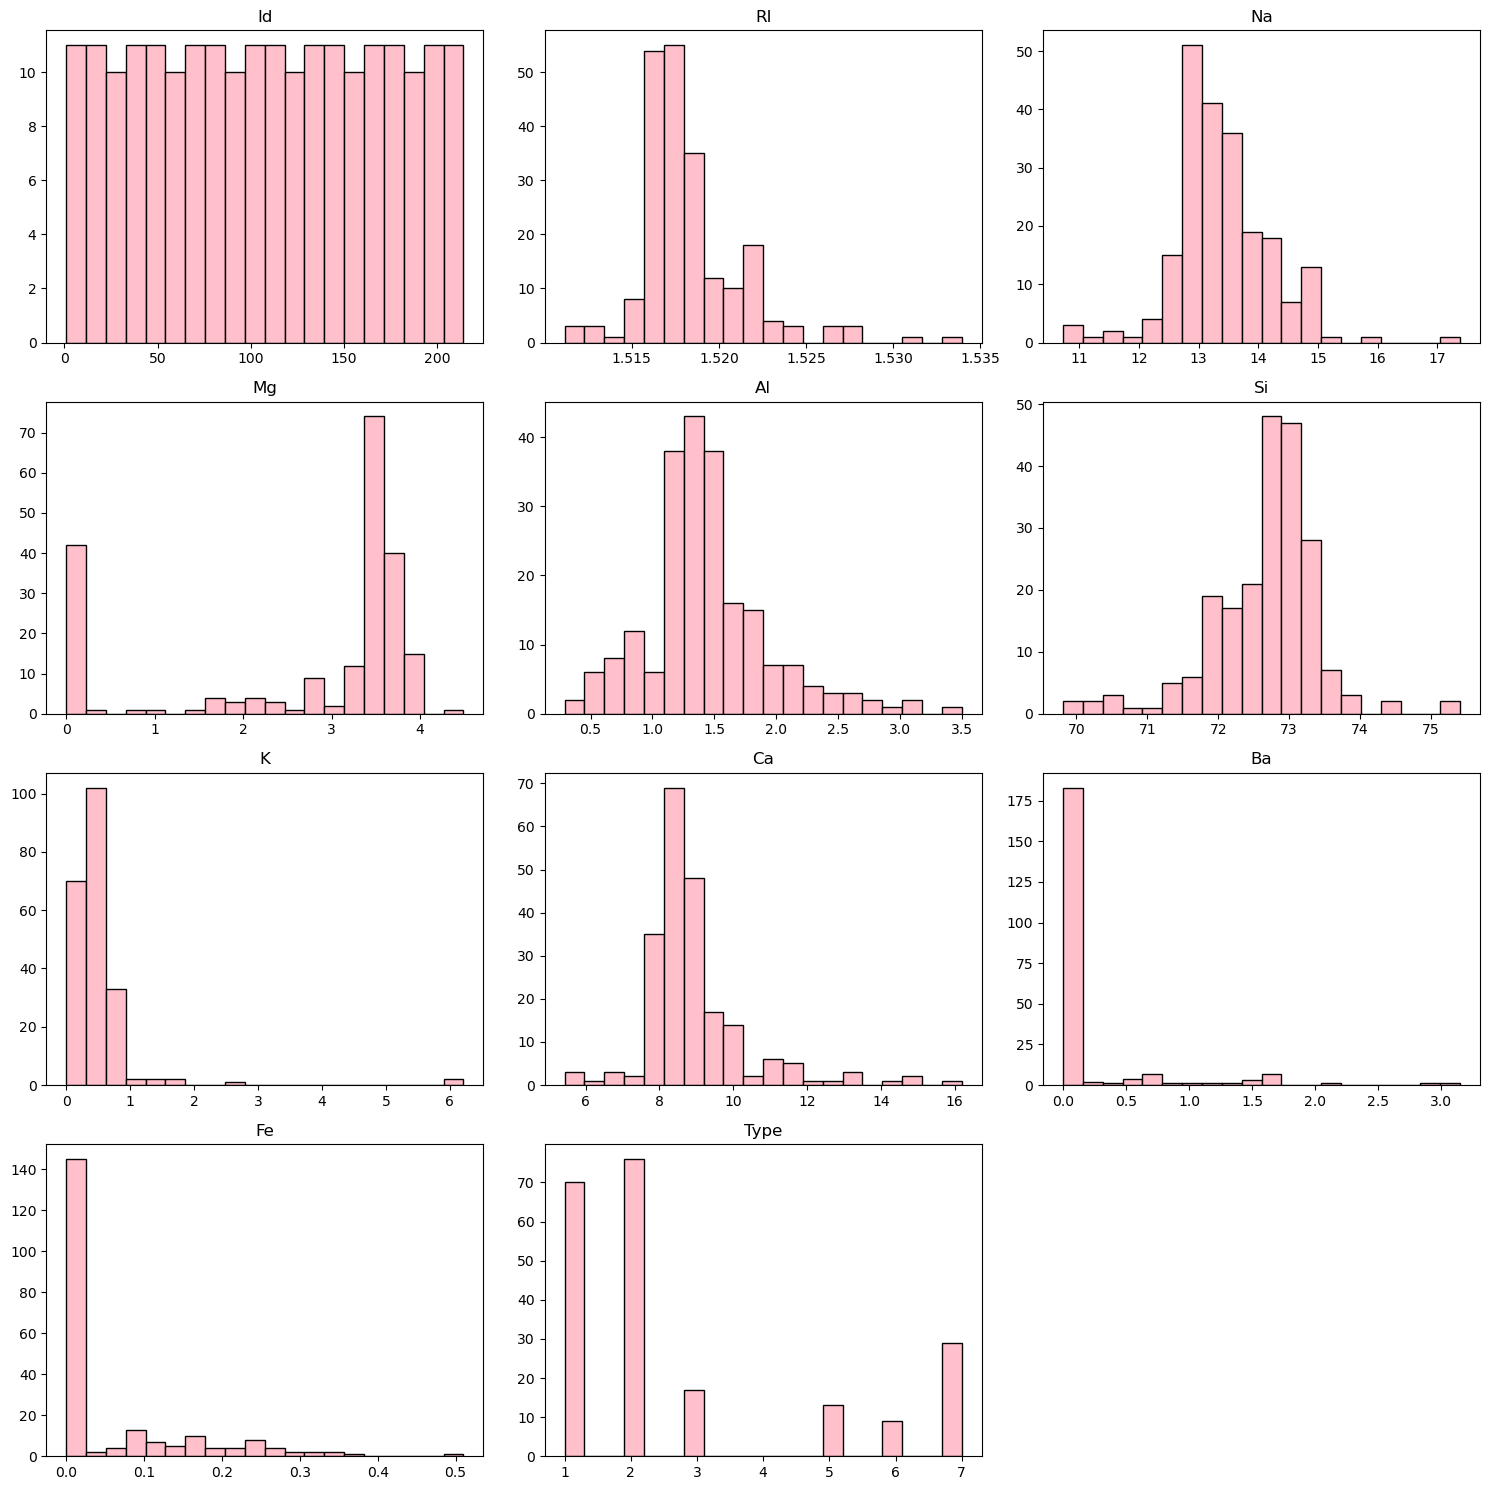

In [188]:
#Univariant Analysis
df.hist(bins=20, edgecolor="black", figsize=(15,15), color="pink", grid=False)
plt.tight_layout()
plt.show()

* Looking at the graph above, it's noticeable that none of the plotted distributions forms a perfect bell-shaped structure.
* The 'Type' column displays a categorical variable that signifies the specific type of glass. Hence from here we can consider     that it is a classification problem.

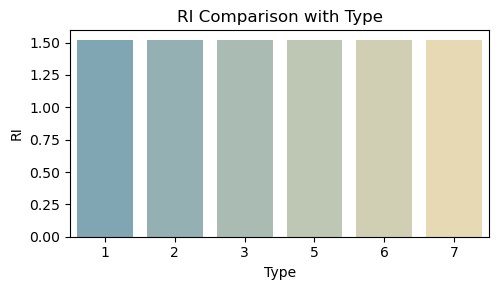

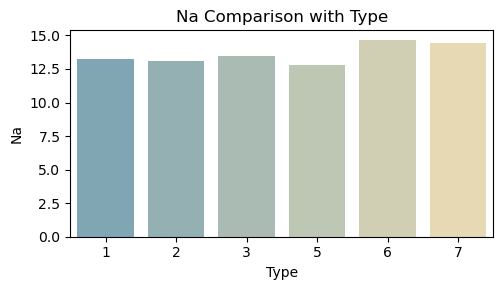

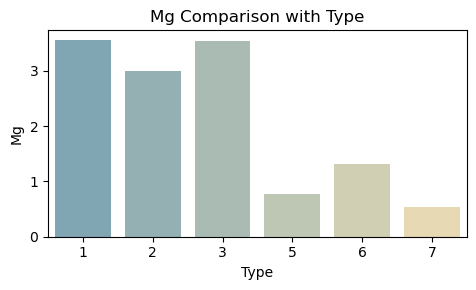

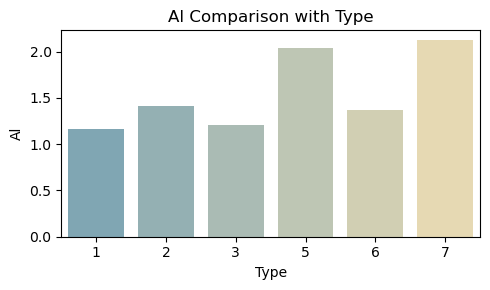

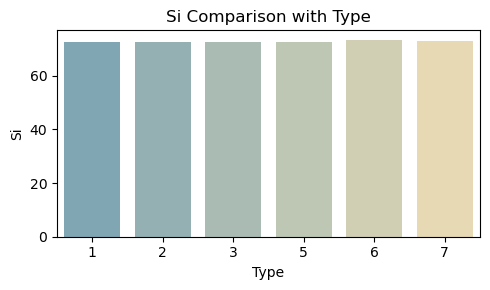

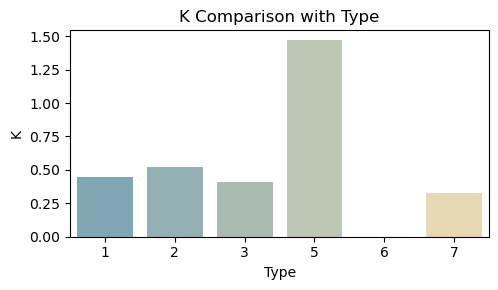

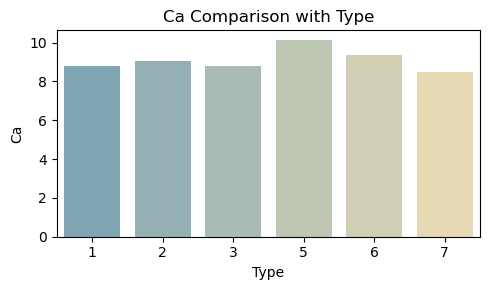

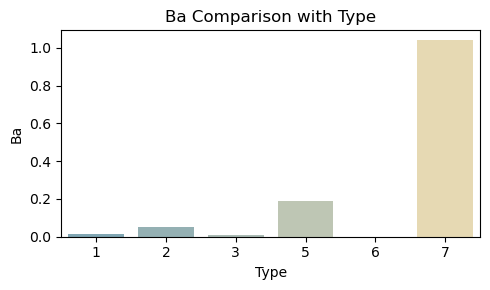

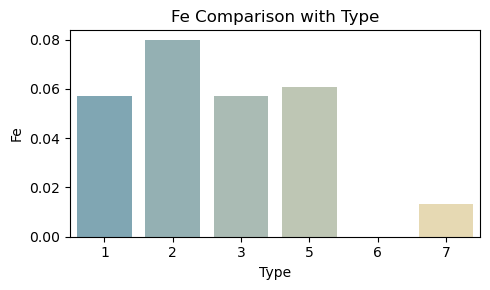

In [189]:
# Bivariant Analysis

# List of elements
elements = ['RI','Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']

# Loop over elements
for i in elements:
   
    plt.figure(figsize=(5, 3))    
    plt.title(f"{i} Comparison with Type")
    
    sns.barplot(x=df['Type'], y=df[i],  errorbar=None, palette="blend:#7AB,#EDA")
    
    plt.ylabel(i)
    plt.tight_layout()
    plt.show()

Type    1.000000
Id      0.877357
Al      0.598829
Ba      0.575161
Na      0.502898
Si      0.151565
Ca      0.000952
K      -0.010054
RI     -0.164237
Fe     -0.188278
Mg     -0.744993
Name: Type, dtype: float64


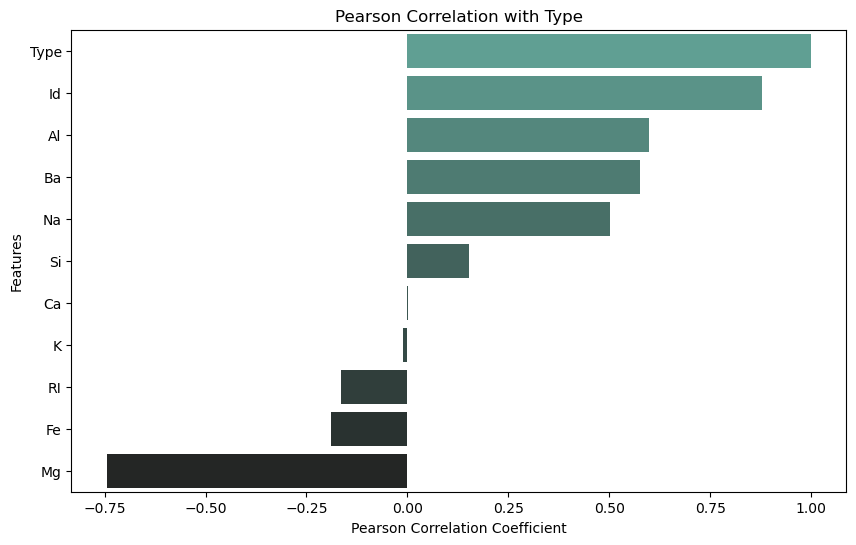

In [190]:
a = df.corr('pearson')['Type'].sort_values(ascending=False)
print(a)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=a.values, y=a.index, palette="dark:#5A9_r")
plt.title('Pearson Correlation with Type')
plt.xlabel('Pearson Correlation Coefficient')
plt.ylabel('Features')
plt.show()

**Based on the bivariate analysis and correlation data between "Type" and other variables, we can draw the conclusion that**

**Id:-**
**Correlation:** Strong positive correlation of 0.8774.
**Explanation:** There is a significant positive linear relationship between the 'Type' and 'Id.' As the 'Id' increases, the 'Type' tends to increase as well.

**RI (Refractive Index):-**
**Correlation:** Moderate negative correlation of -0.1642.
**Explanation:** There is a moderate negative linear relationship between 'Type' and 'RI.' As the refractive index decreases, the 'Type' tends to increase.

**Na (Sodium):-**
**Correlation:** Moderate positive correlation of 0.5029.
**Explanation:** There is a moderate positive linear relationship between 'Type' and 'Na.' Higher sodium content is associated with higher 'Type.'

**Mg (Magnesium):-**
**Correlation:** Strong negative correlation of -0.7450.
**Explanation:** There is a strong negative linear relationship between 'Type' and 'Mg.' Higher magnesium content is associated with lower 'Type.'

**Al (Aluminum):-**
**Correlation:** Strong positive correlation of 0.5988.
**Explanation:** There is a strong positive linear relationship between 'Type' and 'Al.' Higher aluminum content is associated with higher 'Type.'

**Si (Silicon):-**
**Correlation:** Moderate positive correlation of 0.1516.
**Explanation:** There is a moderate positive linear relationship between 'Type' and 'Si.' Higher silicon content is associated with higher 'Type.'

**K (Potassium):-**
**Correlation:** Weak negative correlation of -0.0101.
**Explanation:** There is a weak negative linear relationship between 'Type' and 'K.' Potassium content does not strongly influence 'Type.'

**Ca (Calcium):-**
**Correlation:** Weak positive correlation of 0.0010.
**Explanation:** There is a weak positive linear relationship between 'Type' and 'Ca.' Calcium content does not strongly influence 'Type.'

**Ba (Barium):**
**Correlation:** Moderate positive correlation of 0.5752.
**Explanation:** There is a moderate positive linear relationship between 'Type' and 'Ba.' Higher barium content is associated with higher 'Type.'

**Fe (Iron):**
**Correlation:** Moderate negative correlation of -0.1883.
**Explanation:** There is a moderate negative linear relationship between 'Type' and 'Fe.' Higher iron content is associated with lower 'Type.'

Type of Class [1 2 3 5 6 7]


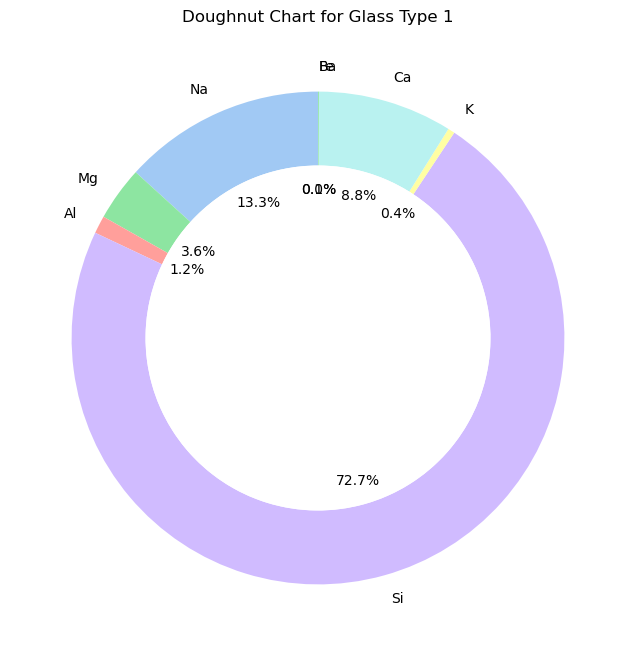

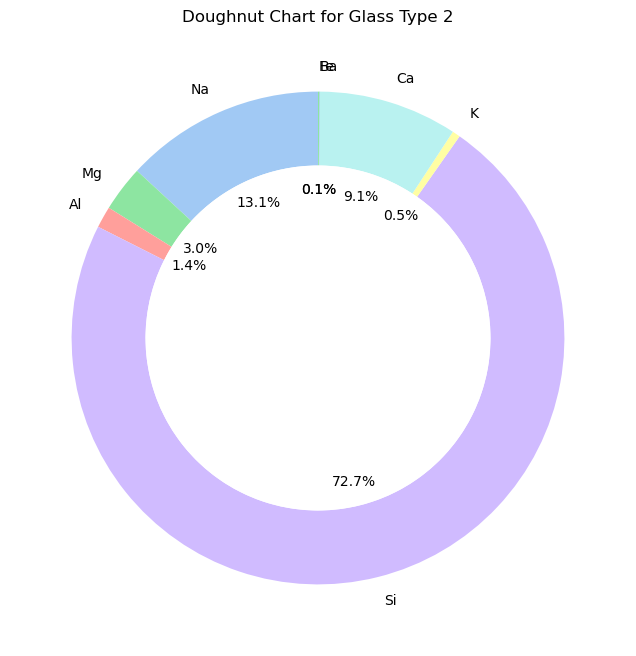

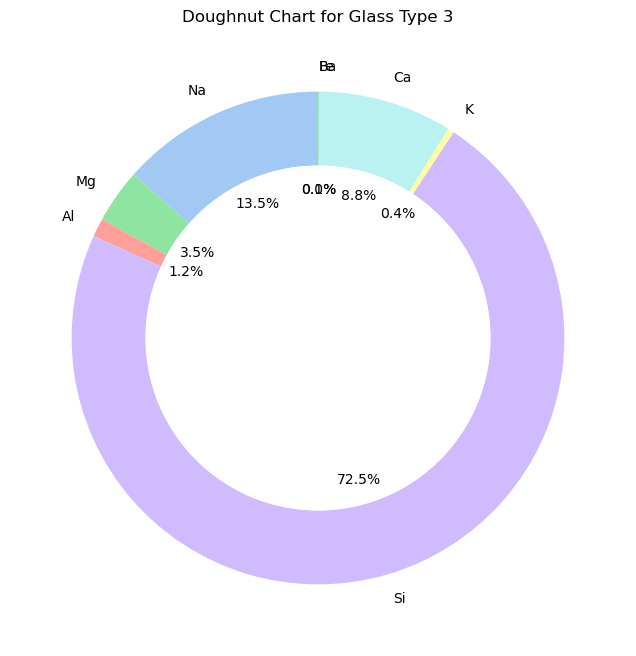

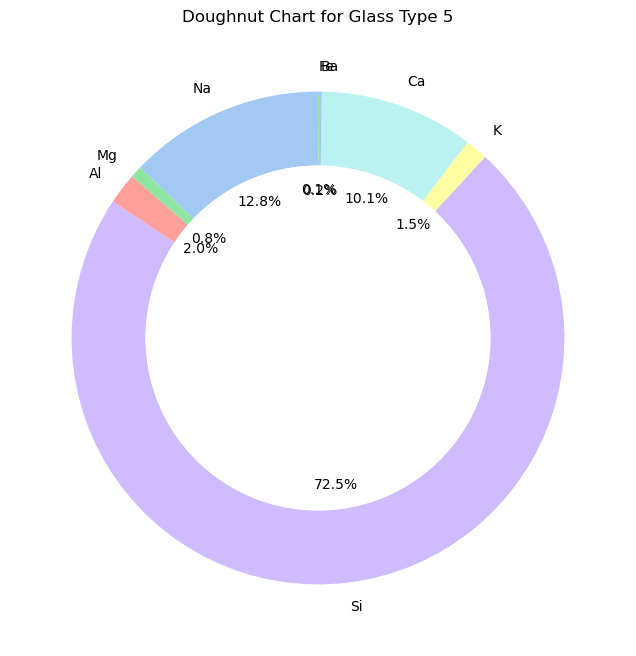

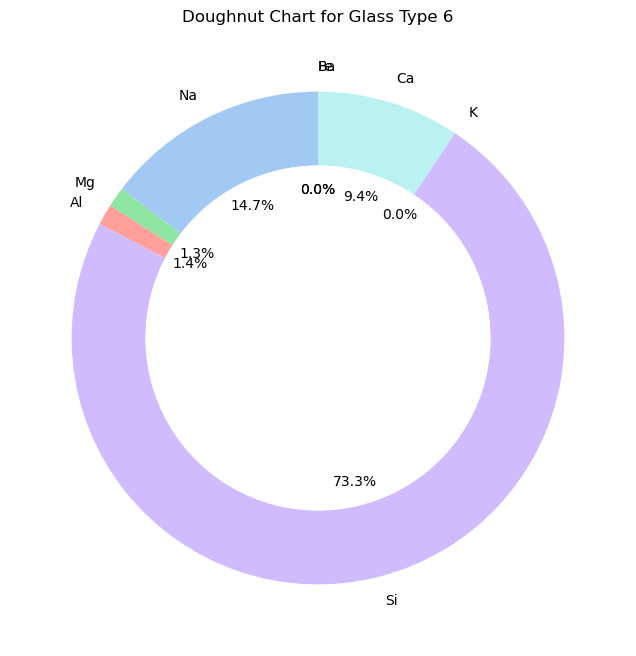

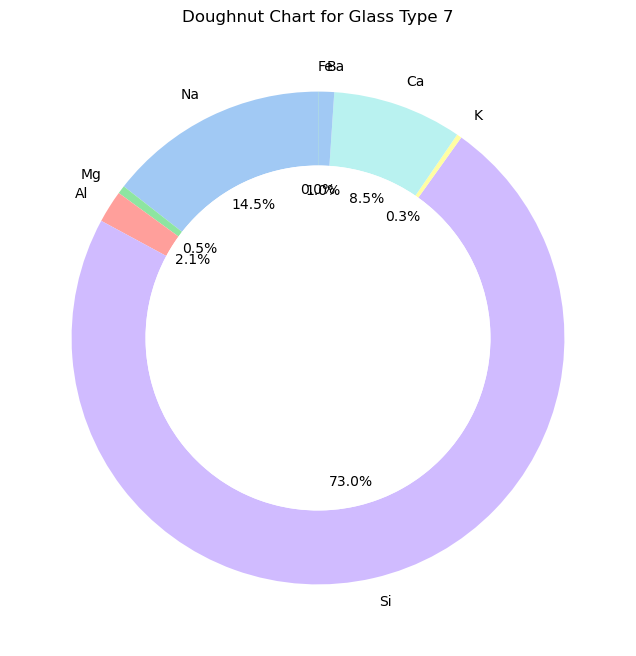

In [191]:
# Get unique glass types
glass_types = df['Type'].unique()
print("Type of Class", glass_types)

# Loop over each glass type
for glass_type in glass_types:
    # Filter data for the current glass type
    subset = df[df['Type'] == glass_type]

    # Extract elemental compositions
    elements = ['Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']

    plt.figure(figsize=(8, 8))
    plt.pie(subset[elements].mean(), labels=elements, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.3), colors=sns.color_palette('pastel6'))
    plt.title(f'Doughnut Chart for Glass Type {glass_type}')
    plt.gca().add_artist(plt.Circle((0, 0), 0.7, fc='white'))
    plt.show()

**Based on the preceding donut chart, it is evident that**

* 'Si' (Silicon) has highest percentange in every class type and  'K' (Potassium) has lowest percentange in every class type.

* Therefore, we can infer that 'Si' holds the highest significance for glass, while 'K' is a less crucial material for glass       production.

**Multivariant Analysis**

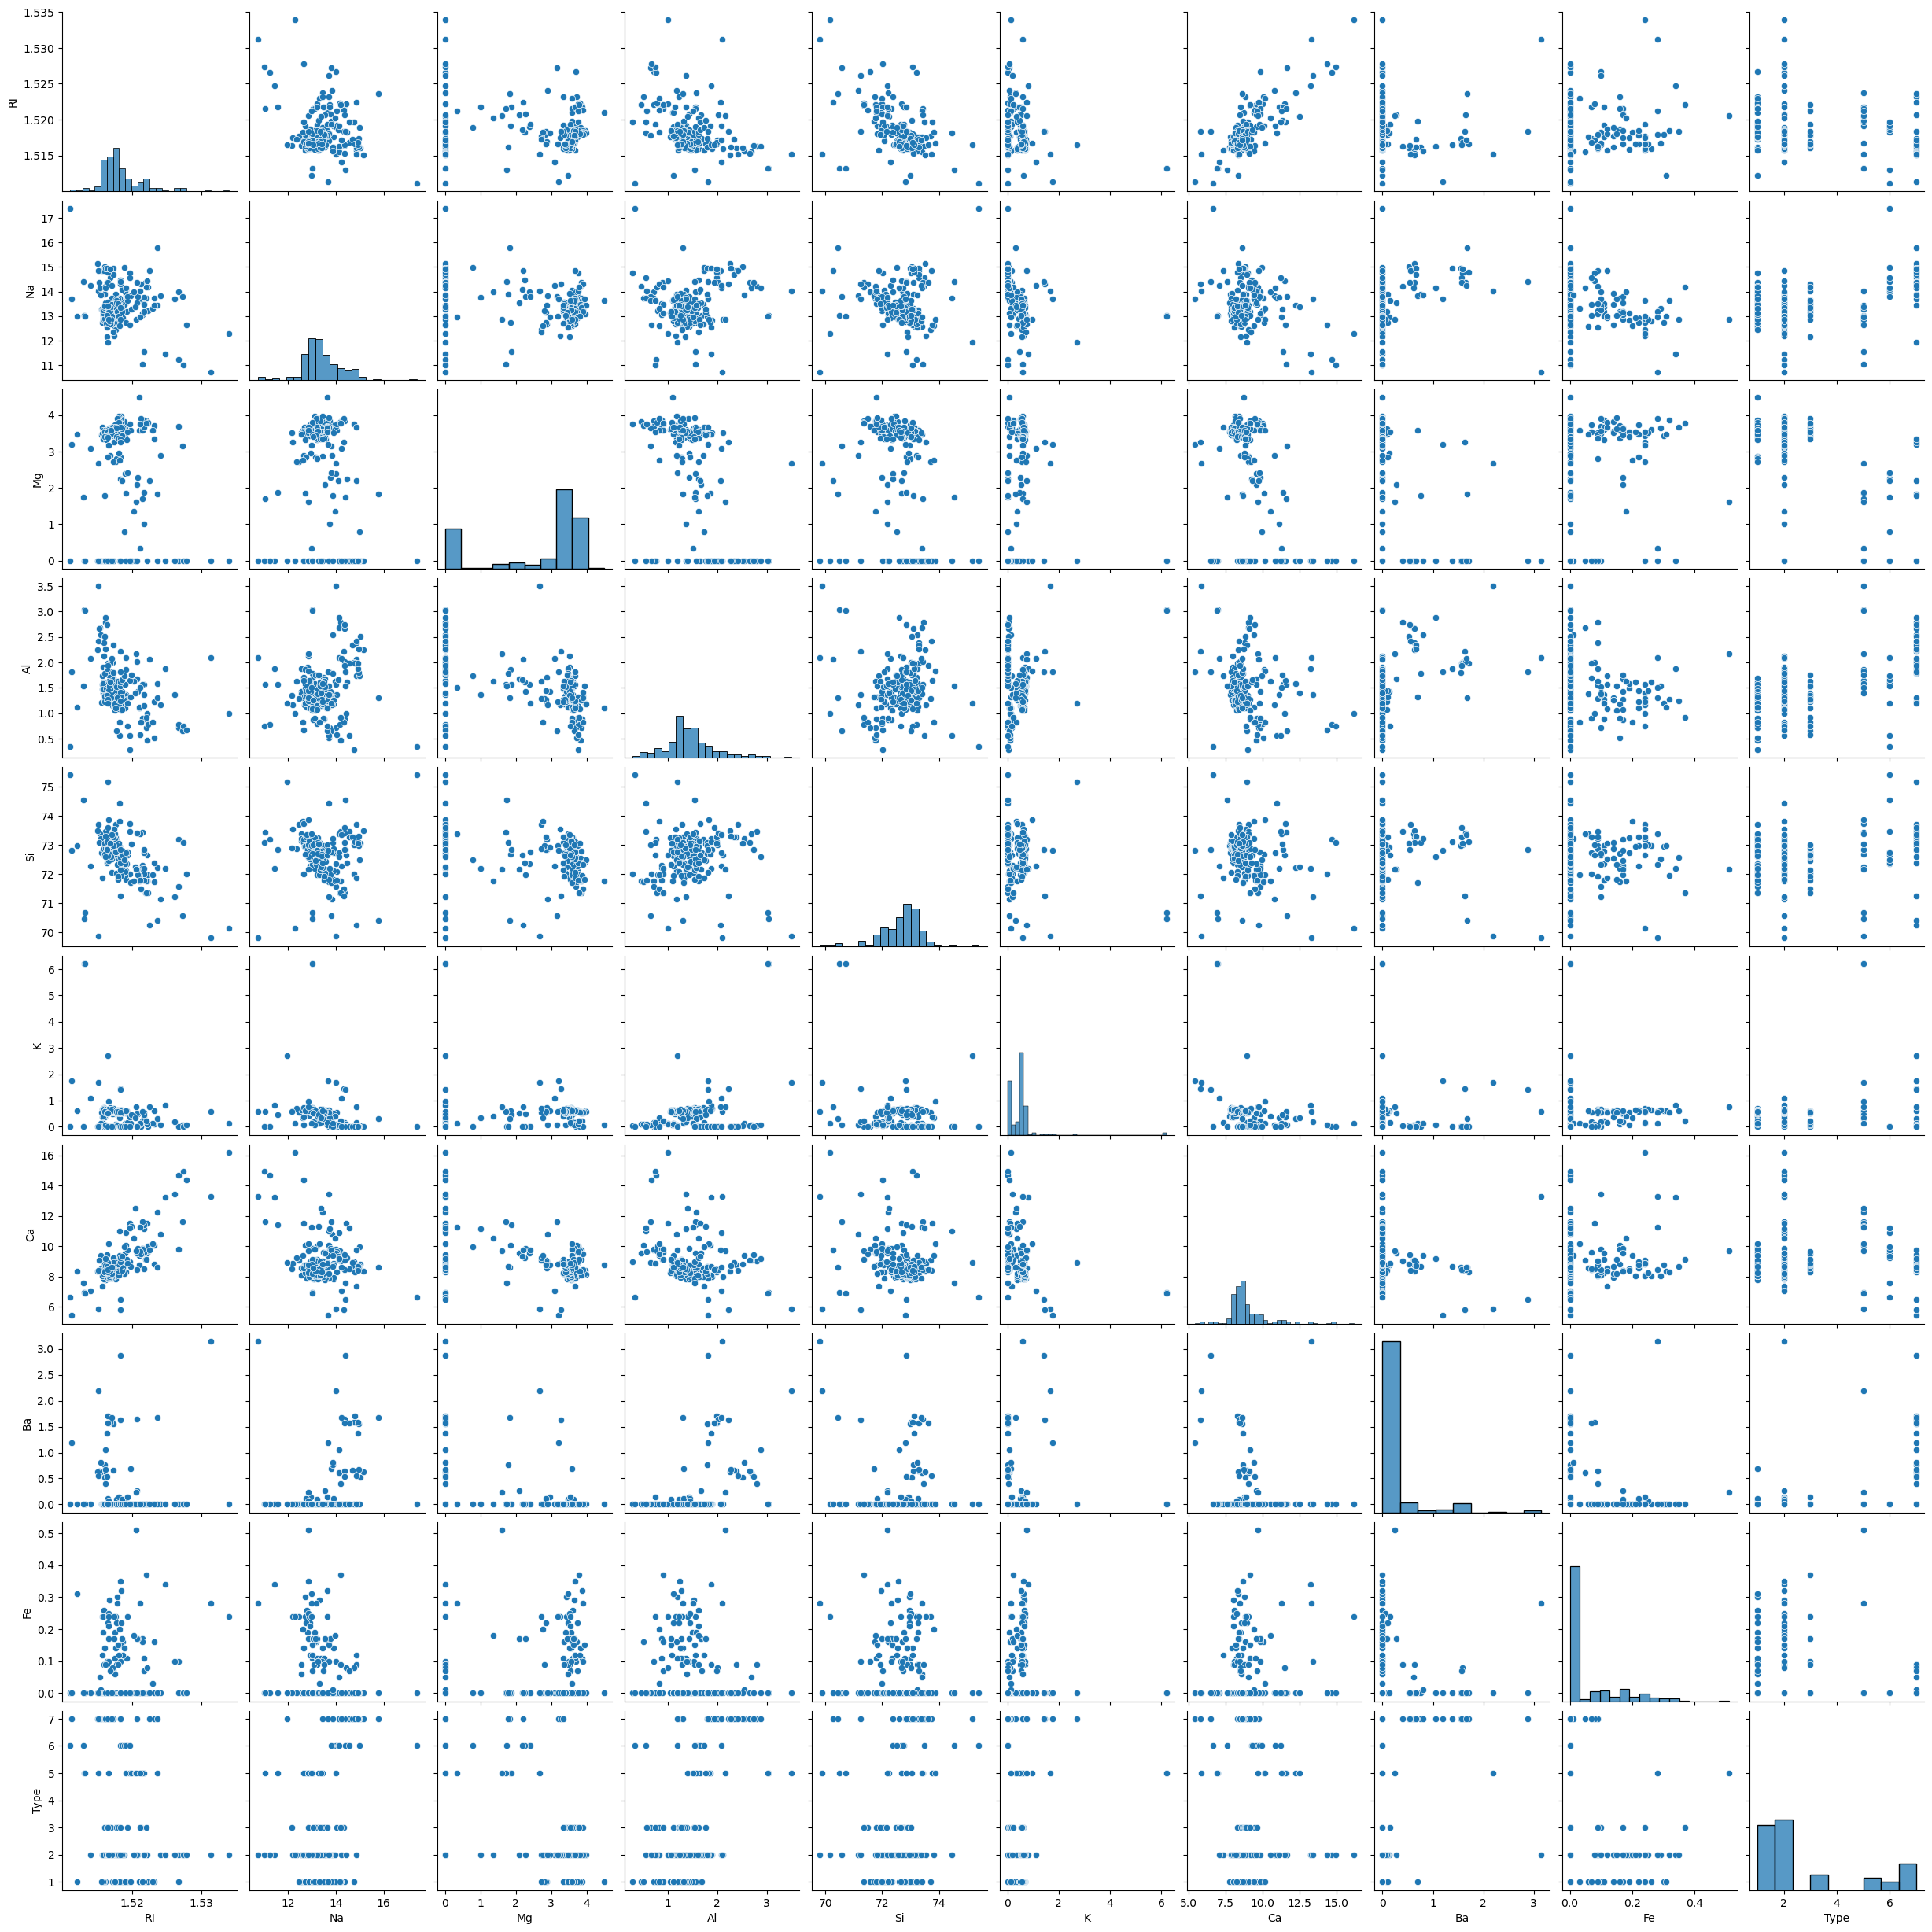

In [192]:
sns.pairplot(df[['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type']])
plt.show()

**Correlation Matrix**

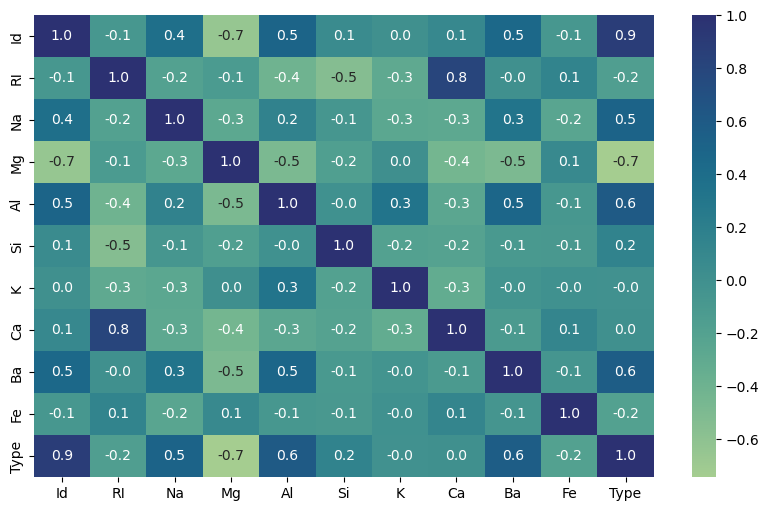

In [193]:
correlation_matrix = df.corr()
plt.figure(figsize = (10, 6))
sns.heatmap(correlation_matrix, cmap="crest",annot=True, fmt=".1f")
plt.show()

In [194]:
correlation_matrix

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
Id,1.000000,-0.072209,0.375722,-0.650328,0.490113,0.061232,0.003149,0.090800,0.451001,-0.072794,0.877357
RI,-0.072209,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010,-0.164237
Na,0.375722,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346,0.502898
Mg,-0.650328,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060,-0.744993
Al,0.490113,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402,0.598829
Si,0.061232,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201,0.151565
K,0.003149,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719,-0.010054
Ca,0.090800,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968,0.000952
Ba,0.451001,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692,0.575161
Fe,-0.072794,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000,-0.188278


**High Positive Correlations:**

* There is a strong positive correlation between certain elements.
* 'Id' and 'Type' show a significant positive correlation of 0.8774.
* 'RI' and 'Ca' also exhibit a strong positive correlation with a coefficient of 0.8104.
* 'Al' and 'Type' are strongly positively correlated at 0.5988.

**Conclusion:** In above variables have a strong linear relationship where both variables move in the same direction.

**High Negative Correlations:**

* A strong negative correlation is observed between certain elements.
* 'Mg' and 'Type' demonstrate a strong negative correlation of -0.7450.
* 'Mg' and 'Al' also show a notable negative correlation, with a coefficient of -0.4818.
* 'RI' and 'Si' exhibit a moderate negative correlation of -0.5421.

**Conclusion:** In the above variables have astrong linear relationship where both variables move in opposite directions.
                As one variable goes up, the other goes down, and vice versa.
 
**The correlations of elements with Type, we can see in the "Bivariant Analysis" as well.**

**In the above explanation, we see a positive correlation with the "Id" number, but keeping it might not be necessary. Each row in the DataFrame already has a unique identifier, making the "Id" redundant.**

In [195]:
# Removing ID column 
df = df.drop("Id", axis = 1)

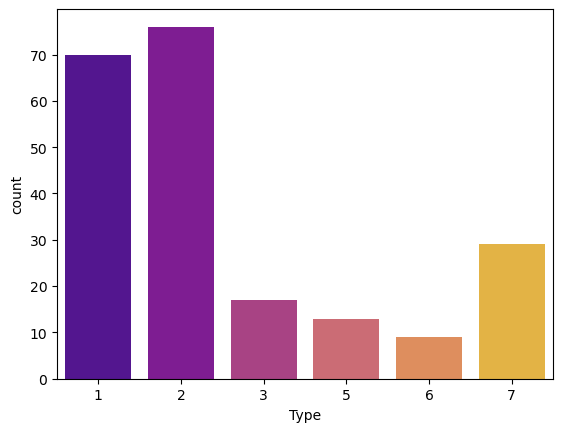

In [196]:
# Visualizing Type of class
sns.countplot(x='Type', data=df, palette='plasma')
plt.show()

* There seems to be a descending order of values for the "Type" column, where the lower numbers correspond to higher types.

* Types 1 to 4 are usually window glass, and types 5 to 7 are not for windows.  So, as per the categories for window and non-     windown glass, we can converts the 'Type' column into binary values, where 0 indicates types 1 to 4, and 1 indicates types 5     to 7.

In [197]:
# Map Type column to binary values (0 for 1-4 (window glass), 1 for 5-7 (Non-window glass))

df['Type'] = df['Type'].map({1: 0, 2: 0, 3: 0, 4: 0, 5: 1, 6: 1, 7: 1})

In [198]:
df['Type'].unique()

array([0, 1], dtype=int64)

**Visualising the Type column after mapping the values in windows_class and Non_window_class** 

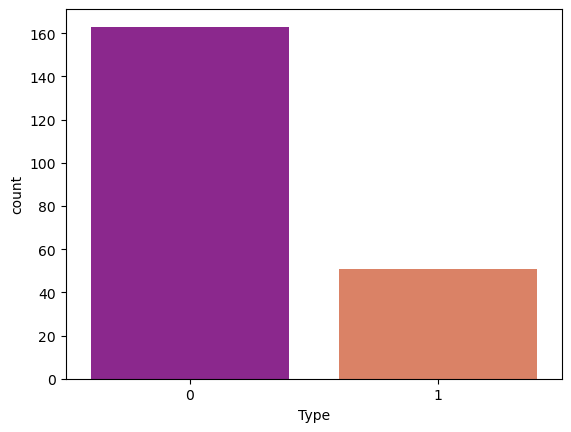

In [199]:
# Visualizing Type of class
sns.countplot(x='Type', data=df, palette='plasma')
plt.show()

###### Identifying and Addressing Outliers

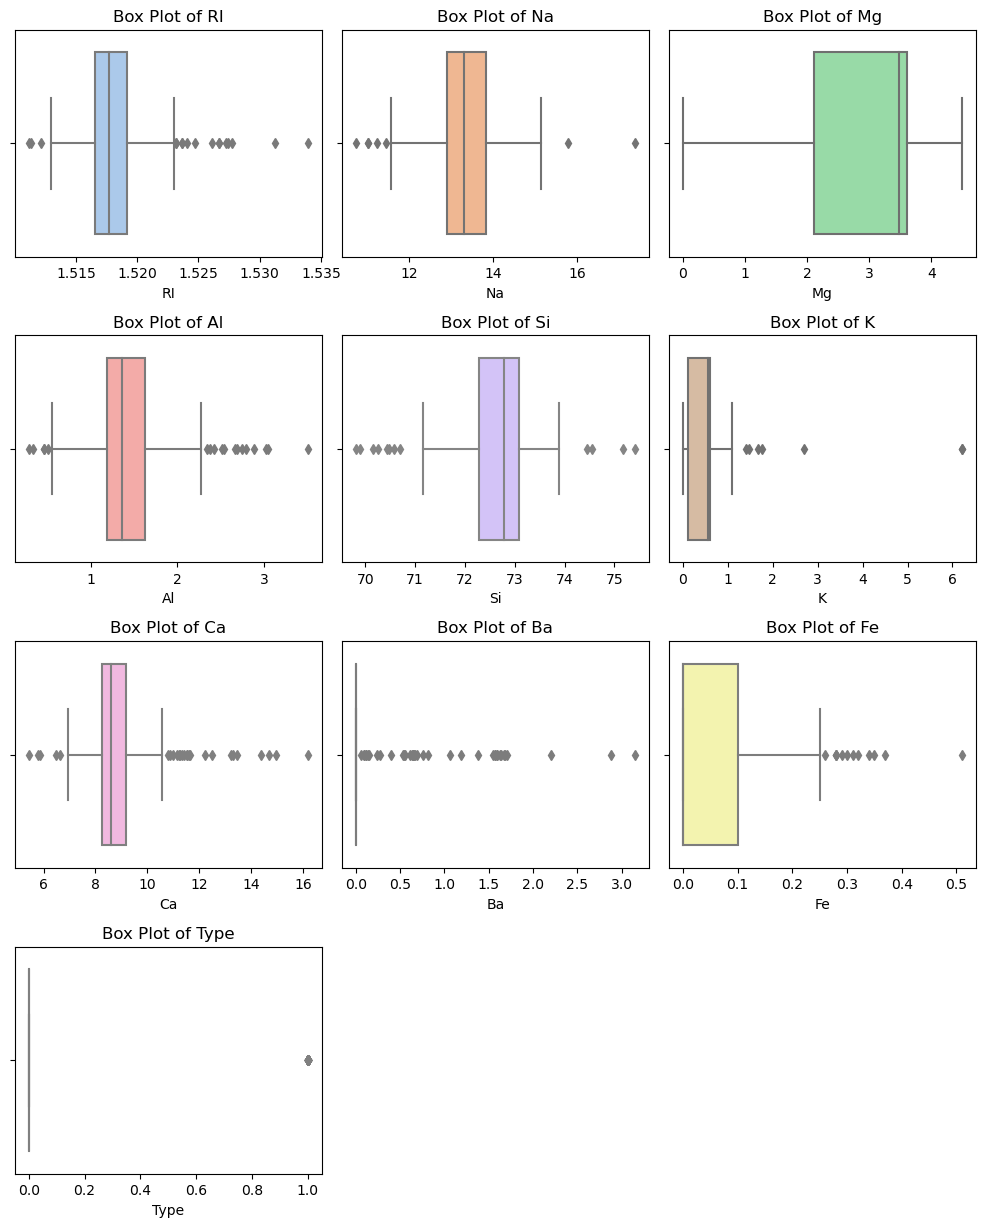

In [200]:
num_cols = len(df.columns)

# To handle an odd number of columns
num_rows = (num_cols // 2) + (num_cols % 2)

plt.figure(figsize=(10, 15))

# Define the 'pastel' color palette
pastel_palette = sns.color_palette('pastel')

# Loop through each column in the DataFrame
for i, (col, color) in enumerate(zip(df.columns, pastel_palette), 1):
    
    # Adjust the number of columns based on your preference
    plt.subplot(num_rows, 3, i)

    
    sns.boxplot(x=df[col], color=color)
    
    plt.title(f'Box Plot of {col}')

plt.tight_layout()
plt.show()

In [201]:
from scipy.stats import zscore

out_data = df.drop('Type', axis= 1)

z=np.abs(zscore(out_data))

z

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.872868,0.284953,1.254639,0.692442,1.127082,0.671705,0.145766,0.352877,0.586451
1,0.249333,0.591817,0.636168,0.170460,0.102319,0.026213,0.793734,0.352877,0.586451
2,0.721318,0.149933,0.601422,0.190912,0.438787,0.164533,0.828949,0.352877,0.586451
3,0.232831,0.242853,0.698710,0.310994,0.052974,0.112107,0.519052,0.352877,0.586451
4,0.312045,0.169205,0.650066,0.411375,0.555256,0.081369,0.624699,0.352877,0.586451
...,...,...,...,...,...,...,...,...,...
209,0.704815,0.898681,1.865511,2.881125,0.052974,0.640968,0.157088,1.783978,0.586451
210,0.500178,1.856097,1.865511,1.094342,0.529374,0.763919,0.392276,2.852405,0.586451
211,0.754046,1.168721,1.865511,1.154570,0.995252,0.763919,0.364103,2.953200,0.586451
212,0.612399,1.193270,1.865511,0.993960,1.241133,0.763919,0.335931,2.812087,0.586451


In [202]:
#threshold = 3
np.where(z>3)

(array([105, 106, 106, 106, 106, 106, 107, 107, 107, 110, 111, 112, 112,
        131, 145, 162, 163, 163, 163, 171, 171, 172, 172, 174, 184, 184,
        188, 189, 201, 201, 203, 207, 213], dtype=int64),
 array([6, 0, 1, 4, 6, 7, 0, 4, 6, 6, 6, 0, 6, 6, 8, 8, 3, 4, 7, 3, 5, 3,
        5, 8, 1, 4, 4, 7, 4, 5, 7, 7, 7], dtype=int64))

In [203]:
#Now we removing the data above Zscore and creating new df

df_new =df[(z<3).all(axis=1)]

df_new.shape

(194, 10)

In [204]:
#Shape of old and new DataFrame
print('Old Data Frame- ',df.shape[0])
print('New Data Frame-',df_new.shape[0])

Old Data Frame-  214
New Data Frame- 194


In [205]:
print('Data Loss Percentage- ', ((df.shape[0]-df_new.shape[0])/df.shape[0])*100)

Data Loss Percentage-  9.345794392523365


In [206]:
#df=df1

In [207]:
# Ist quantile 
Q1 = out_data.quantile(0.25)

Q3 = out_data.quantile(0.75)

#IQR
IQR=Q3-Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df2=out_data[~((out_data < (Q1 - 1.5* IQR)) |(out_data > (Q3 + 1.5* IQR))).any(axis=1)]

In [208]:
df2.shape

(136, 9)

In [209]:
print('Data Loss percentage After removing outliers with IQR method-', ((df.shape[0]-df2.shape[0])/df.shape[0])*100)

Data Loss percentage After removing outliers with IQR method- 36.44859813084112


* In both scenarios, the application of both Z-score and the interquartile range (IQR) method to eliminate outliers led to a       higher degree of data loss, and these losses are considered non-negotiable.

* Additionally, it was observed that the application of the interquartile range (IQR) method for outlier removal led to a         greater extent of data loss when compared to the Z-score method.

**Conclusion:** Therefore, I have choosen not to get rid of the unusual values since doing so would lead to losing a large amount of data.

In [210]:
df.skew().to_frame('Skewness_Value').style.background_gradient(cmap='mako_r')

,Skewness_Value
RI,1.625431
Na,0.454181
Mg,-1.152559
Al,0.907290
Si,-0.730447
K,6.551648
Ca,2.047054
Ba,3.416425
Fe,1.754327
Type,1.237086


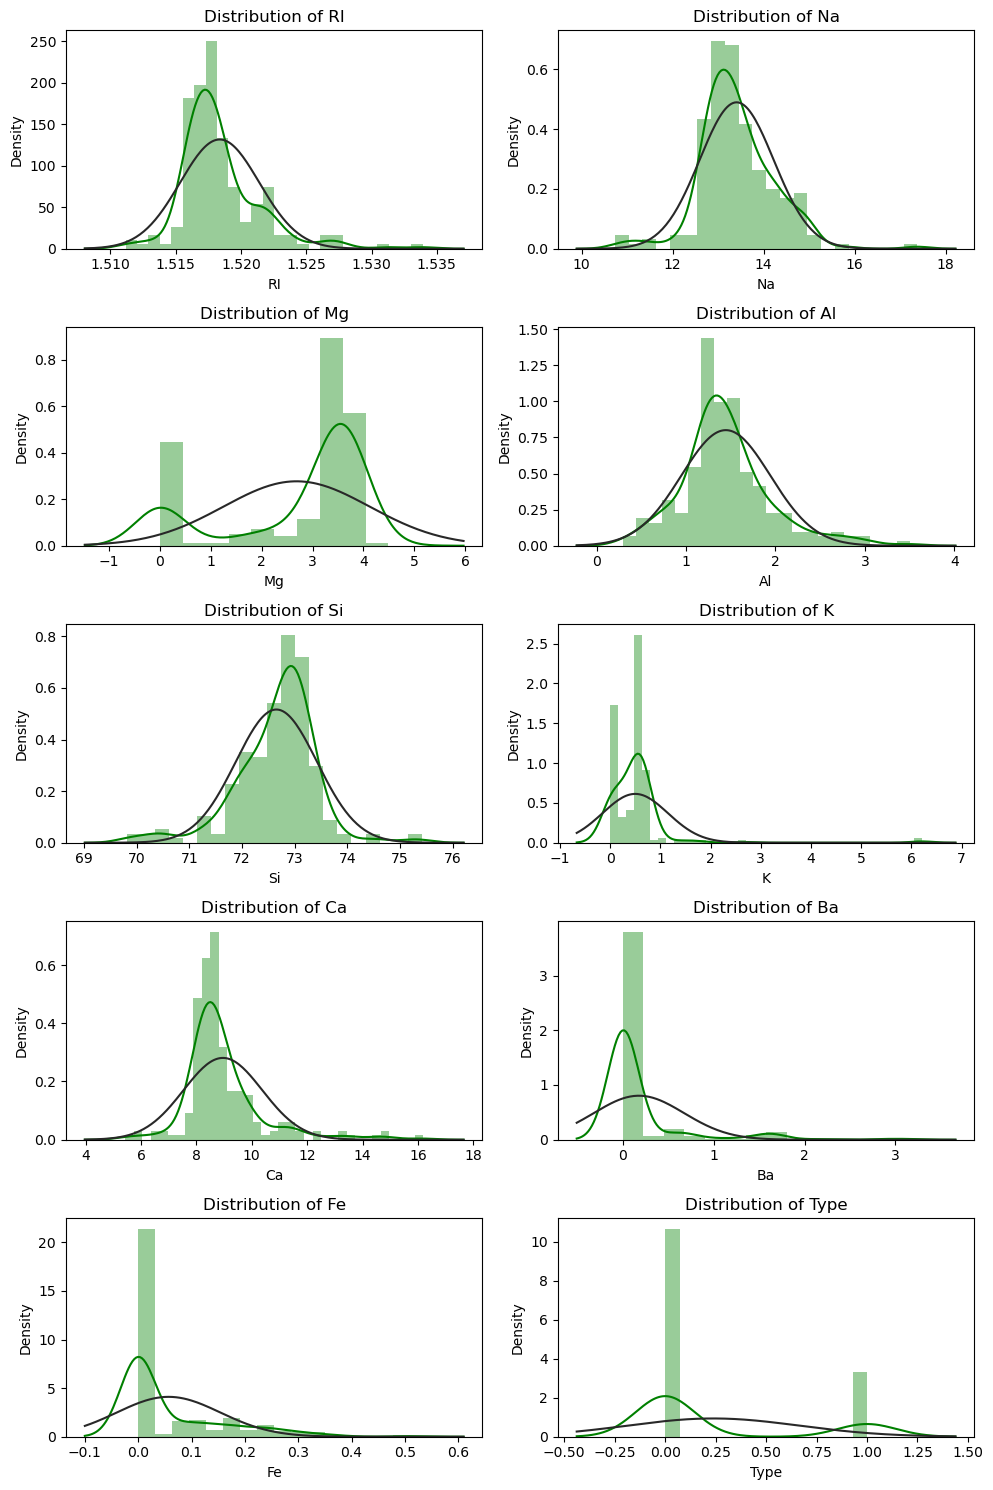

In [211]:
num_cols = len(df.columns)

 # To handle odd number of columns
num_rows = (num_cols // 2) + (num_cols % 2) 

plt.figure(figsize=(10, 15))

# Loop through each column in the DataFrame

for i, col in enumerate(df.columns, 1):
    
    # Adjust the number of columns based on your preference
    plt.subplot(num_rows, 2, i)  
    sns.distplot(df[col], fit=stats.norm, color='green')
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

**Based on the Visualization of skewness and skewness data, we can draw the conclusion that:**
* **RI (Refractive Index):** The positive skewness indicates a right-skewed distribution. The tail on the right side is longer                                or fatter than the left side.
 * **Na (Sodium):** The positive skewness suggests a right-skewed distribution. Similar to RI, the distribution has a longer                         right  tail.
 * **Mg (Magnesium):** The negative skewness indicates a left-skewed distribution. The tail on the left side is longer or fatter                        than the right side.
 * **Al (Aluminum):** The positive skewness implies a right-skewed distribution. The distribution has a longer right tail.
 
 * **Si (Silicon):** The negative skewness suggests a left-skewed distribution. The tail on the left side is longer or fatter                        than the right side.

 * **K (Potassium):** The extremely high positive skewness indicates a heavily right-skewed distribution. The right tail is                           significantly longer than the left, and there are potentially extreme values on the right side.

 * **Ca (Calcium):** The high positive skewness indicates a right-skewed distribution. The right tail is longer.

 * **Ba (Barium):**  The very high positive skewness indicating  an extremely right-skewed distribution. The right tail is                            exceptionally longer.
 
 * **Fe (Iron):** The positive skewness indicates a right-skewed distribution. The right tail is longer.
 
 * **Type:** The positive skewness indicates a right-skewed distribution. The right tail is longer.


**Observation:** **Upon examination of outlier detection techniques and skewness values, it can be inferred that:**

1. Due to a extremely high loss of data in both outlier removal techniques, we opted not to use either method to address the          outlier issue.

2. Similarly, in the case of skewness, the presence of extremely high skewness values (e.g., K, Ca, Ba) signifies distributions    with exceptionally long tails on one side

**Note:** If the data is leaning a lot to one side, it can be helpful to change it a bit so that it looks more balanced.

Therefore, I have choosen here power tranform due to the features:

Skewness is a measure of asymmetry, By applying power transformations, the transformed data is intended to be more Gaussian-like or normally distributed.

In [212]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer()

df2 = pt.fit_transform(df.iloc[:,:-1])
df2 =pd.DataFrame(df2, columns = df.iloc[:,:-1].columns)
df2.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,7.285839e-17,0.317061,1.876273,-0.662630,-1.138642,-1.289781,-0.010654,-0.45489,-0.680015
1,-2.081668e-17,0.616577,0.668163,-0.077498,0.044314,0.274843,-0.884532,-0.45489,-0.680015
2,-5.898060e-17,0.183344,0.608046,0.291075,0.400267,0.018565,-0.938251,-0.45489,-0.680015
3,-1.734723e-17,-0.212585,0.778426,-0.228458,-0.115117,0.501963,-0.488967,-0.45489,-0.680015
4,-2.428613e-17,-0.137547,0.692438,-0.339129,0.526911,0.453753,-0.636365,-0.45489,-0.680015


In [213]:
df2.skew()

RI    0.000000
Na   -0.008973
Mg   -0.889528
Al    0.000219
Si    0.130384
K    -0.071816
Ca   -0.209314
Ba    1.824175
Fe    0.858508
dtype: float64

In [214]:
df2['Type'] = df['Type']
df2.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,7.285839e-17,0.317061,1.876273,-0.662630,-1.138642,-1.289781,-0.010654,-0.45489,-0.680015,0
1,-2.081668e-17,0.616577,0.668163,-0.077498,0.044314,0.274843,-0.884532,-0.45489,-0.680015,0
2,-5.898060e-17,0.183344,0.608046,0.291075,0.400267,0.018565,-0.938251,-0.45489,-0.680015,0
3,-1.734723e-17,-0.212585,0.778426,-0.228458,-0.115117,0.501963,-0.488967,-0.45489,-0.680015,0
4,-2.428613e-17,-0.137547,0.692438,-0.339129,0.526911,0.453753,-0.636365,-0.45489,-0.680015,0


###### Creating a distinction between features and labels.

**In this observation**, it's evident that the dataset lacks balance. Given that the task at hand involves classification, we will address this imbalance by employing an oversampling technique.

In [215]:
 df2.shape

(214, 10)

###### Addressing Class Imbalance in Machine Learning"

In [216]:
# Balancing Class Distribution with SMOTE

from imblearn.over_sampling import SMOTE

x =df2.iloc[:,:-1]
y =df2.iloc[:,-1]

x.shape , y.shape

((214, 9), (214,))

In [217]:
y.value_counts()

0    163
1     51
Name: Type, dtype: int64

In [218]:
from imblearn.over_sampling import SMOTE

In [219]:
# now resample the data using SMOTE

smt = SMOTE()
x1,y1= smt.fit_resample(x,y)

In [220]:
x1.shape , y1.shape

((326, 9), (326,))

In [221]:
x1.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,7.285839e-17,0.317061,1.876273,-0.662630,-1.138642,-1.289781,-0.010654,-0.45489,-0.680015
1,-2.081668e-17,0.616577,0.668163,-0.077498,0.044314,0.274843,-0.884532,-0.45489,-0.680015
2,-5.898060e-17,0.183344,0.608046,0.291075,0.400267,0.018565,-0.938251,-0.45489,-0.680015
3,-1.734723e-17,-0.212585,0.778426,-0.228458,-0.115117,0.501963,-0.488967,-0.45489,-0.680015
4,-2.428613e-17,-0.137547,0.692438,-0.339129,0.526911,0.453753,-0.636365,-0.45489,-0.680015


In [222]:
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(x1):
    vif=pd.DataFrame()
    vif['variables']=x1.columns
    vif['VIF FACTOR']=[variance_inflation_factor(x1.values,i) for i in range(x1.shape[1])]
    return(vif)

calc_vif(x1)

,variables,VIF FACTOR
0,RI,5.484763
1,Na,4.054726
2,Mg,5.014701
3,Al,3.186371
4,Si,1.575109
5,K,5.286233
6,Ca,5.370099
7,Ba,3.716451
8,Fe,1.189877


##### Separating the dataset

In [224]:
from sklearn.model_selection import train_test_split

#Splitting the data into train & test data
x_train, x_test, y_train, y_test= train_test_split(x1, y1, random_state=42, test_size= 0.20)

In [230]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, RandomizedSearchCV
from sklearn.metrics import make_scorer, accuracy_score, recall_score, precision_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

import pickle

import warnings
warnings.filterwarnings('ignore')

###### Model Selection

In [231]:
#Cross Validation

# Creating a list to store results

results = []

# Perform 10-fold cross-validation for each classifier and store results
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Support Vector Machine': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Naive Bayes': GaussianNB(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

for clf_name, clf in classifiers.items():
    
    # Creating a pipeline with StandardScaler and the classifier
    pipeline = make_pipeline(StandardScaler(), clf)
    
    # Calculate accuracy score using cross-validation
    scores = cross_val_score(pipeline, x_train, y_train, cv=10, scoring='accuracy')
    
    # Predict using cross-validation
    y_pred = cross_val_predict(pipeline, x_train, y_train, cv=10)
    
    # Compute classification metrics: Mean Accuracy, Precision, Recall, F1-Score
    mean_accuracy = np.mean(scores)
    precision = precision_score(y_train, y_pred)
    recall = recall_score(y_train, y_pred)
    f1_score_value = f1_score(y_train, y_pred)
    
    # Append results to the 'results' list as a dictionary
    results.append({
        'Classifier': clf_name,
        'Accuracy': mean_accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1_score_value
    })

# Create a DataFrame from the list of dictionaries
results_df = pd.DataFrame(results)

In [232]:
# Print the results as a DataFrame
results_df.sort_values(by='F1 Score', ascending=False)

,Classifier,Accuracy,Precision,Recall,F1 Score
1,Support Vector Machine,0.976923,0.969697,0.984615,0.977099
3,Random Forest,0.969231,0.969697,0.984615,0.977099
6,K-Nearest Neighbors,0.969231,0.962121,0.976923,0.969466
5,Gradient Boosting,0.961538,0.961832,0.969231,0.965517
0,Logistic Regression,0.965385,0.976378,0.953846,0.964981
2,Decision Tree,0.942308,0.968000,0.930769,0.949020
4,Naive Bayes,0.930769,0.930769,0.930769,0.930769


###### Hyperparameter Tuning

In [236]:
# Instantiate Parameters for Random Forest

param_rf = {
        'n_estimators': [50, 100, 200],
        'criterion': ['gini', 'entropy'],
        'max_depth': [None, 5, 10, 15, 20],
        'min_samples_split': [2, 5, 10]
    }

# Instantiate Parameters for Decision Tree
param_dt = {
        'criterion': ['gini', 'entropy'],
        'splitter': ['best', 'random'],
        'max_depth': [None, 5, 10, 15, 20]
    }

# Instantiate the Decision Tree Classifier Object
param_gb = {
    'loss': ['deviance', 'exponential'],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [3, 4, 5, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 0.9, 1.0],
    'max_features': ['sqrt', 'log2', None]
}

###### Random Forest parameter tuning

In [237]:
# Instantiate the Random Forest Classifier Object
clf_rf =  RandomForestClassifier()

# Instantiate Randomized Search CV for Random Forest Classifier
random_search_rf = RandomizedSearchCV(clf_rf, param_distributions=param_rf,
                                           n_iter=10, scoring='accuracy', cv=5, n_jobs=-1, random_state=42)

# Fit the Data
random_search_rf.fit(x1, y1)

# Print the Best parameters and best score
print(random_search_rf.best_params_)
print(random_search_rf.best_score_)

{'n_estimators': 200, 'min_samples_split': 2, 'max_depth': 10, 'criterion': 'entropy'}
0.9600466200466201


In [238]:
clf_rf = RandomForestClassifier(n_estimators=50, min_samples_split=5, max_depth=20, criterion='gini', random_state=42)

# fit the training data to the Random Forest Classifier
clf_rf.fit(x_train, y_train)

# prediction on test data
y_pred_rf = clf_rf.predict(x_test)

# print the classification report
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        33
           1       0.97      1.00      0.99        33

    accuracy                           0.98        66
   macro avg       0.99      0.98      0.98        66
weighted avg       0.99      0.98      0.98        66



###### Decision Tree Hyperparameter Tuning

In [239]:
# Instantiate the Decision Tree Classifier Object
clf_dt =  DecisionTreeClassifier()

# Instantiate Randomized Search CV for Decision Tree Classifier
random_search_dt = RandomizedSearchCV(clf_dt, param_distributions=param_dt,
                                           n_iter=10, scoring='accuracy', cv=5, n_jobs=-1, random_state=42)

# Fit the Data
random_search_dt.fit(x1, y1)

# Print the Best parameters and best score
print(random_search_dt.best_params_)
print(random_search_dt.best_score_)

{'splitter': 'best', 'max_depth': None, 'criterion': 'gini'}
0.957109557109557


In [240]:
clf_dt = DecisionTreeClassifier(splitter='best', max_depth=None, criterion='gini', random_state=42)

# fit the training data to the Random Forest Classifier
clf_dt.fit(x_train, y_train)

# prediction on test data
y_pred_dt = clf_dt.predict(x_test)

# print the classification report
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        33
           1       0.97      0.97      0.97        33

    accuracy                           0.97        66
   macro avg       0.97      0.97      0.97        66
weighted avg       0.97      0.97      0.97        66



###### Gradient Boosting Hyperparameter Tuning

In [241]:
# Instantiate the Gradient Boosting Classifier Object
clf_gb = GradientBoostingClassifier()

# Instantiate Randomized Search CV for Gradient Boosting Classifier
random_search_gb = RandomizedSearchCV(
    clf_gb, param_distributions=param_gb,
    n_iter=10, scoring='accuracy', cv=5, n_jobs=-1, random_state=42)

# Fit the Data
random_search_gb.fit(x1, y1)

# Print the Best parameters and best score
print("Best Parameters:", random_search_gb.best_params_)
print("Best Score:", random_search_gb.best_score_)

Best Parameters: {'subsample': 0.9, 'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': 4, 'loss': 'deviance', 'learning_rate': 0.2}
Best Score: 0.9662937062937063


In [242]:
# Initialize the GradientBoostingClassifier with the best hyperparameters
clf_gb = GradientBoostingClassifier(
    subsample=0.9,
    n_estimators=300,
    min_samples_split=10,
    min_samples_leaf=1,
    max_features='log2',
    max_depth=5,
    loss='exponential',
    learning_rate=0.2,
    random_state=42
)

# Fit the training data to the Gradient Boosting Classifier
clf_gb.fit(x_train, y_train)

# Predict on the test data
y_pred_gb = clf_gb.predict(x_test)

# Print the classification report
print(classification_report(y_test, y_pred_gb))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        33
           1       0.97      1.00      0.99        33

    accuracy                           0.98        66
   macro avg       0.99      0.98      0.98        66
weighted avg       0.99      0.98      0.98        66



##### Plotting Confusion Matrix

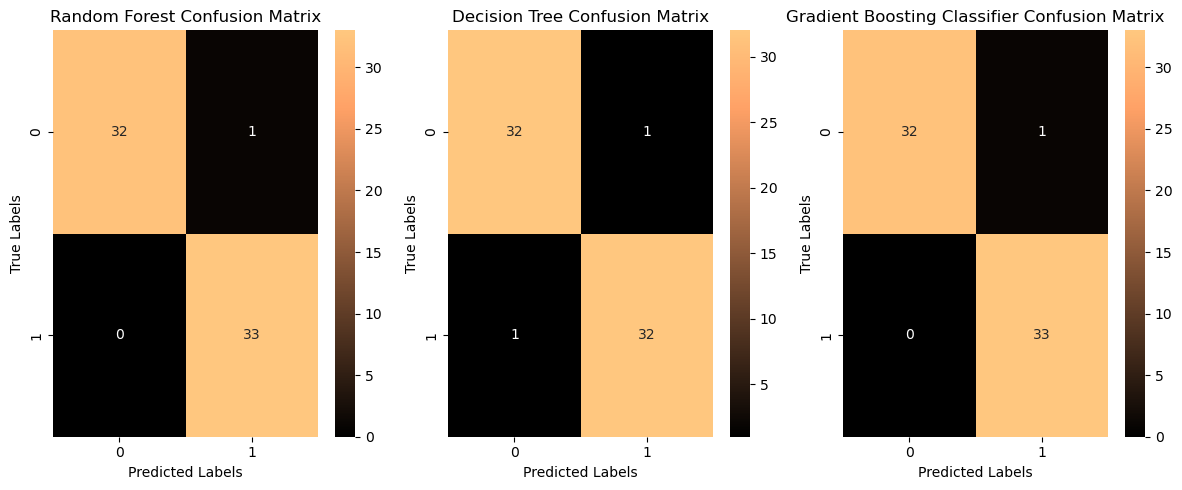

In [243]:
# Calculate confusion matrices for all three models
cm_rf = confusion_matrix(y_test, y_pred_rf)
cm_dt = confusion_matrix(y_test, y_pred_dt)
cm_gb = confusion_matrix(y_test, y_pred_gb)

# Create subplots for the confusion matrices
fig, axes = plt.subplots(1, 3, figsize=(12, 5))

# Plot Random Forest Confusion Matrix
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="copper", ax=axes[0])
axes[0].set_title('Random Forest Confusion Matrix')
axes[0].set_xlabel('Predicted Labels')
axes[0].set_ylabel('True Labels')

# Plot Decision Tree Confusion Matrix
sns.heatmap(cm_dt, annot=True, fmt="d", cmap="copper", ax=axes[1])
axes[1].set_title('Decision Tree Confusion Matrix')
axes[1].set_xlabel('Predicted Labels')
axes[1].set_ylabel('True Labels')

# Plot Gradient Boosting Classifier Confusion Matrix
sns.heatmap(cm_gb, annot=True, fmt="d", cmap="copper", ax=axes[2])
axes[2].set_title('Gradient Boosting Classifier Confusion Matrix')
axes[2].set_xlabel('Predicted Labels')
axes[2].set_ylabel('True Labels')

plt.tight_layout()
plt.show()

###### ROC-AUC Curve

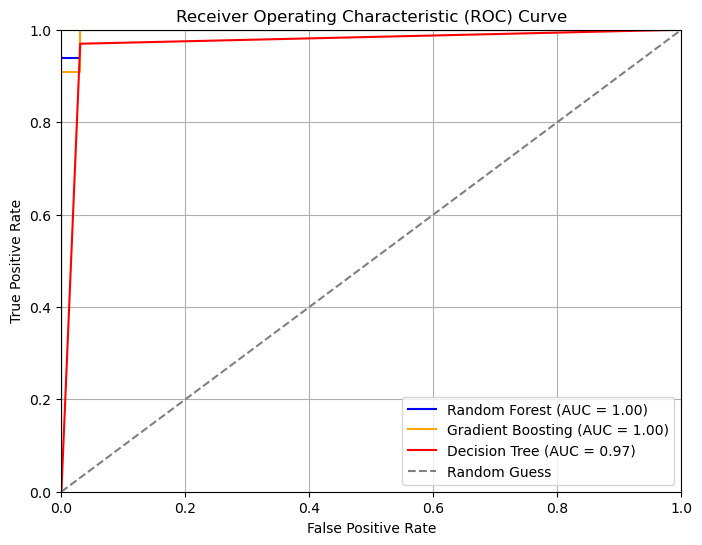

In [244]:
# Calculate ROC curve and AUC for Random Forest
y_prob_rf = clf_rf.predict_proba(x_test)[:, 1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_prob_rf)
roc_auc_rf = roc_auc_score(y_test, y_prob_rf)

# Calculate ROC curve and AUC for Gradient Boosting
y_prob_gb = clf_gb.predict_proba(x_test)[:, 1]
fpr_gb, tpr_gb, thresholds_gb = roc_curve(y_test, y_prob_gb)
roc_auc_gb = roc_auc_score(y_test, y_prob_gb)

# Calculate ROC curve and AUC for Decision Tree
y_prob_dt = clf_dt.predict_proba(x_test)[:, 1]
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_prob_dt)
roc_auc_dt = roc_auc_score(y_test, y_prob_dt)

# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})', color='blue')
plt.plot(fpr_gb, tpr_gb, label=f'Gradient Boosting (AUC = {roc_auc_gb:.2f})', color='orange')
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {roc_auc_dt:.2f})', color='red')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')


plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()

plt.show()

In [245]:
# Compute ROC AUC score
y_prob = clf_rf.predict_proba(x_test)[:, 1]
auc_score = roc_auc_score(y_test, y_prob)
print("ROC AUC Score for Random Forest:", auc_score)

# Compute ROC AUC score
y_prob = clf_dt.predict_proba(x_test)[:, 1]
auc_score = roc_auc_score(y_test, y_prob)
print("ROC AUC Score for Decision Tree:", auc_score)

# Compute ROC AUC score
y_prob = clf_gb.predict_proba(x_test)[:, 1]
auc_score = roc_auc_score(y_test, y_prob)
print("ROC AUC Score for gradient boosting:", auc_score)

ROC AUC Score for Random Forest: 0.9981634527089073
ROC AUC Score for Decision Tree: 0.9696969696969697
ROC AUC Score for gradient boosting: 0.997245179063361


##### Model Improvement

In [246]:
# scale all the features with Robust Scaler
robust_scaler = RobustScaler()
X_train_scaled = robust_scaler.fit_transform(x_train)
X_test_scaled = robust_scaler.fit(x_test)

# Fit the model with Train data
random_forest_clf = RandomForestClassifier().fit(X_train_scaled, y_train)

# Get Feature Importances
feature_importances = random_forest_clf.feature_importances_

# Store Feature names
feature_names = x_train.columns

# Create a DataFrame to Display the Feature Importances
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

importance_df.sort_values(by='Importance')

,Feature,Importance
0,RI,0.000000
4,Si,0.031255
8,Fe,0.047864
7,Ba,0.056391
5,K,0.065438
6,Ca,0.066462
1,Na,0.119799
3,Al,0.221123
2,Mg,0.391668


In [247]:
# Threshold for feature importance
threshold = 0.05

# Create a mask of features with importance scores above the threshold
important_features_mask = importance_df['Importance'] > threshold

# Get the names of important features
imp_features = importance_df.loc[important_features_mask, 'Feature']

# Select only the important feature
x_train_selected = x_train[imp_features]
x_test_selected = x_test[imp_features]

In [249]:
# New Features
x_train_selected.head()

,Na,Mg,Al,K,Ca,Ba
183,1.390715,-1.739289,-2.151760,-1.619585,1.591331,-0.45489
17,1.163835,0.980994,-1.190611,-0.859116,0.311660,-0.45489
24,-0.000945,0.548740,-0.544690,0.327650,-0.291862,-0.45489
132,0.060737,1.151790,-0.475232,0.525614,-0.557044,-0.45489
113,0.097625,0.955213,-0.294568,0.501963,-0.498618,-0.45489


##### Model Training

In [250]:
# Mask the important features from resample
x2 = x1[imp_features]

# Instantiate RandomizedSearchCV object
random_search_rf = RandomizedSearchCV(clf_rf, param_distributions=param_rf,
                                      n_iter=10, scoring='accuracy', cv=5, n_jobs=-1, random_state=42)

# Fit the random_search_rf with resampled data
random_search_rf.fit(x2, y1)

# Get the results
best_rf_params_random = random_search_rf.best_params_
best_rf_score_random = random_search_rf.best_score_

# Print the best parameters
print('Best Random Forest Parameters (Randomized Search): ')
print(best_rf_params_random)
print('Best score:', best_rf_score_random)

Best Random Forest Parameters (Randomized Search): 
{'n_estimators': 50, 'min_samples_split': 2, 'max_depth': None, 'criterion': 'gini'}
Best score: 0.9600466200466201


In [251]:
clf_rf = RandomForestClassifier(n_estimators=100, min_samples_split=2, max_depth=5, criterion='gini', random_state=42)

# fit the training data to the Random Forest Classifier
clf_rf.fit(x_train_selected, y_train)

# prediction on test data
y_pred_rf_new = clf_rf.predict(x_test_selected)

# print the classification report
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        33
           1       0.97      1.00      0.99        33

    accuracy                           0.98        66
   macro avg       0.99      0.98      0.98        66
weighted avg       0.99      0.98      0.98        66



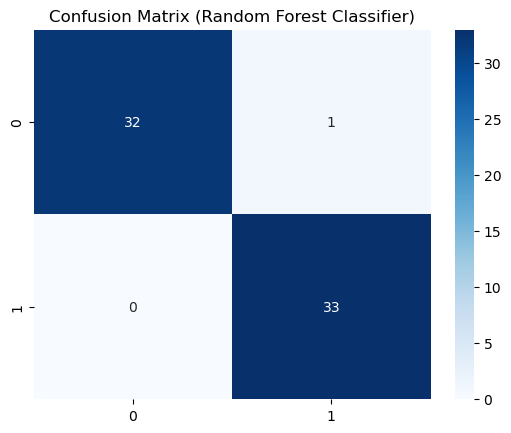

In [252]:
cm_rf_new = confusion_matrix(y_test, y_pred_rf_new)

sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Random Forest Classifier)')
plt.show()

###### Saving the model

In [253]:
filename = 'RndmFstClassifier_Glass_Detection.pkl'
pickle.dump(clf_rf, open(filename, 'wb'))